In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep


from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib
from community import community_louvain
import seaborn as sns
from termcolor import colored
from networkx.algorithms.community import label_propagation_communities
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [42]:
from pandas.core.frame import DataFrame
#df = pd.read_csv('Wine/Rose - Copy.csv', usecols=['Country', 'Rating'])
df = pd.read_csv('khungbo/terrorism-in-turkey.csv', usecols=['city', 'Target_type'])
df

,city,Target_type
0,Trabzon,Unknown
1,Istanbul,Police
2,Istanbul,Tourists
3,Ankara,NGO
4,Kucukmece,Business
...,...,...
542,Unknown,Military
543,Istanbul,Journalists & Media
544,Dogubeyazit district,Transportation
545,Semdinli district,Military


In [43]:
#Tìm missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")
#--------------------------------------
df.replace('NaN', np.nan)
df.replace('Unknown', np.nan)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop_duplicates()
df.head(18)

No missing value found


,city,Target_type
0,Trabzon,Unknown
1,Istanbul,Police
2,Istanbul,Tourists
3,Ankara,NGO
4,Kucukmece,Business
5,Yesilkoy,Transportation
6,Istanbul,Violent Political Party
7,Akdana,Private Citizens & Property
8,Istanbul,Police
9,Unknown,Police


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         547 non-null    object
 1   Target_type  547 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB


In [45]:
df.describe()

,city,Target_type
count,547,547
unique,165,19
top,Istanbul,Government (General)
freq,175,99


In [46]:
import networkx as nx
from networkx.algorithms import bipartite
B = nx.Graph()

Country = df['city']
Rating = df['Target_type']


print('Số lượng thành phố:', Country.nunique())
print('Số lượng loại vũ khí:', Rating.nunique())
print('Số cạnh:', len(df))

Số lượng thành phố: 165
Số lượng loại vũ khí: 19
Số cạnh: 547


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         547 non-null    object
 1   Target_type  547 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB


In [48]:
for index, row in df.iterrows():
    B.add_edge(row['city'], row['Target_type'], weight=1)
    B.add_nodes_from(Country, birpartite = 0)
    B.add_nodes_from(Rating, birpartite = 1)

<Figure size 1008x576 with 0 Axes>

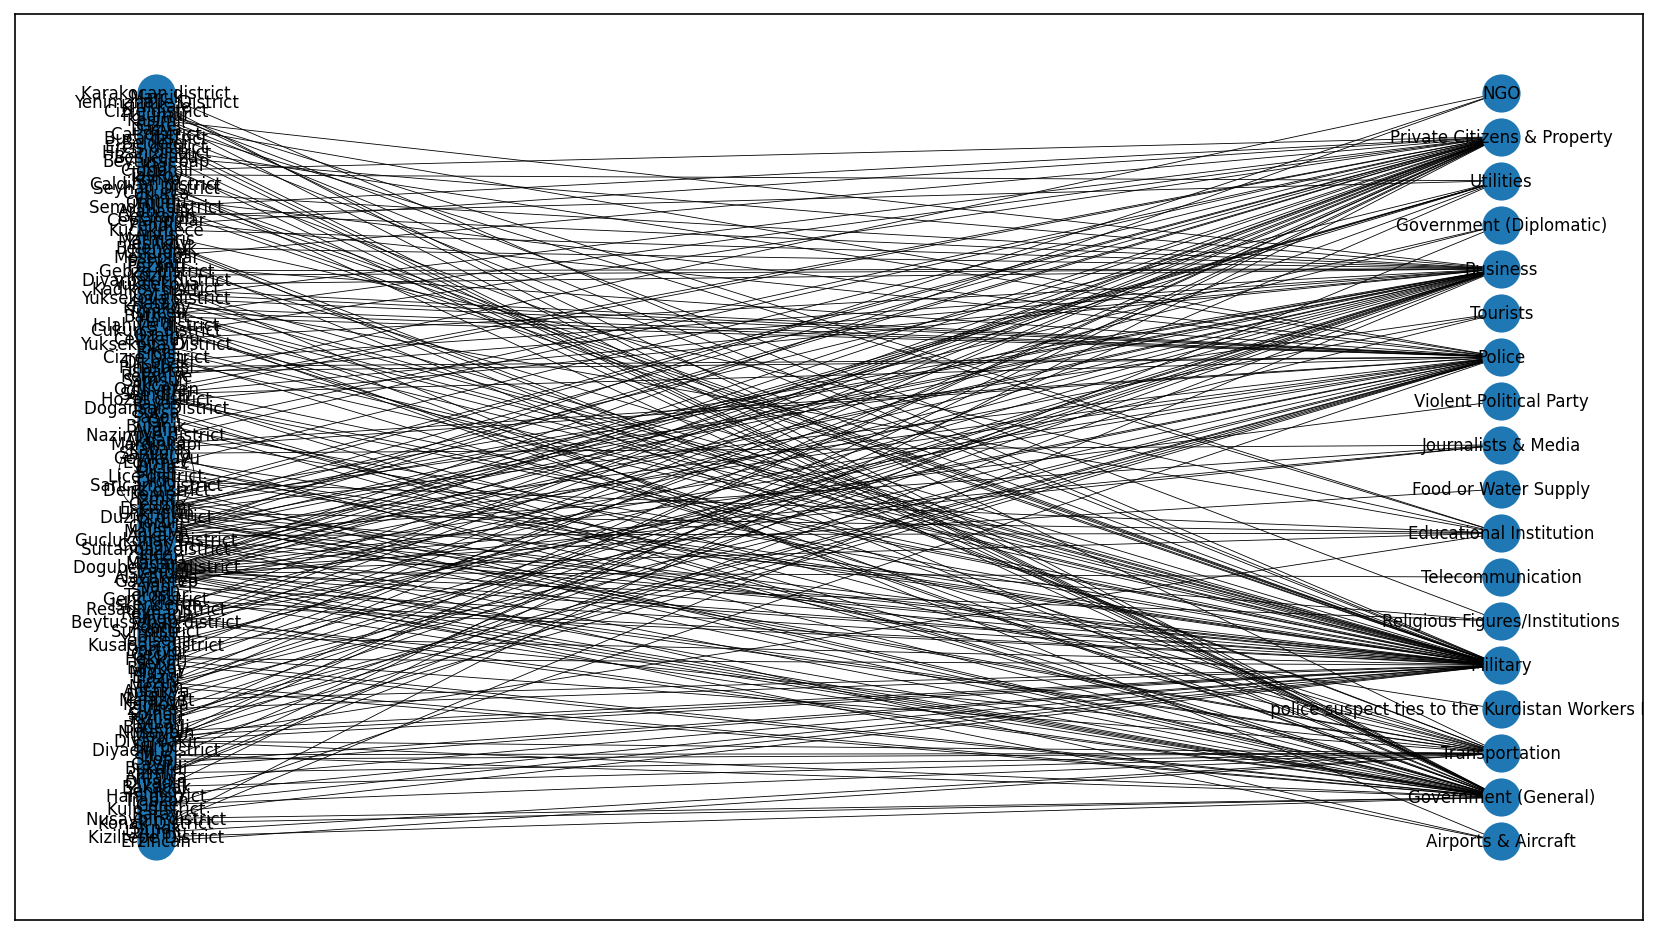

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1, figsize = (14,8), dpi = 150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Country),
                 font_size = 8, width = 0.4)

In [50]:
G = bipartite.weighted_projected_graph(B, Country)
plt.figure(figsize=(12,17))
layout = nx.spring_layout(B, k=1)
nx.draw_networkx_nodes(B, layout, nodelist=Country, node_size=150, node_color='red')
nx.draw_networkx_edges(B, layout, edge_color='#cccccc')
node_labels = dict(zip(Country, Country))
nx.draw_networkx_labels(B, layout, labels=node_labels)
plt.axis('off')
plt.title("Graph City")
plt.show()

NetworkXAlgorithmError: the size of the nodes to project onto (547) is >= the graph size (183).
They are either not a valid bipartite partition or contain duplicates

In [ ]:
labels = nx.get_edge_attributes(B, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
df2.to_csv(r'myTerroData10Nodes.csv', index = False, header = True)

C:\Users\kakac\AppData\Local\Temp\ipykernel_17908\1381458508.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
C:\Users\kakac\AppData\Local\Temp\ipykernel_17908\1381458508.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
C:\Users\kakac\AppData\Local\Temp\ipykernel_17908\1381458508.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
C:\Users\kakac\AppData\Local\Temp\ipykernel_17908\1381458508.py:4: FutureWarning: The frame.append method is deprecated a

In [ ]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib

plt.figure(figsize=(17, 12))
#compute the best partition
partition = community_louvain.best_partition(G)
#color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

NameError: name 'G' is not defined

<Figure size 1224x864 with 0 Axes>

In [ ]:
import numpy as np
values = list(partition.values())

print('Số lượng cộng đồng: ', len(np.unique(values)))

Số lượng cộng đồng:  40


In [ ]:
for i in range(len(np.unique(values))):
  print('Nhóm ', i, ":")
  for name, k in partition.items():
    if k == i:
      print(name)
  print("")

Nhóm  0 :
Australia

Nhóm  1 :
Angola

Nhóm  2 :
San Marino
Hong Kong

Nhóm  3 :
Afghanistan

Nhóm  4 :
Macao
Switzerland

Nhóm  5 :
Spain
Malta

Nhóm  6 :
Mozambique
Iraq

Nhóm  7 :
Luxembourg
Singapore
Bermuda

Nhóm  8 :
Cameroon

Nhóm  9 :
Chad
Nigeria

Nhóm  10 :
Sudan

Nhóm  11 :
Congo (Dem. Republic)

Nhóm  12 :
Canada
Japan
Cyprus
Austria

Nhóm  13 :
Estonia
Thailand

Nhóm  14 :
Slovakia
United Kingdom
Bahrain
Oman
North Macedonia

Nhóm  15 :
Portugal
France
South Korea
Germany

Nhóm  16 :
Romania
China
Latvia

Nhóm  17 :
Lithuania
Malaysia

Nhóm  18 :
Georgia
Maldives
Paraguay
Kuwait
Costa Rica
Argentina
Morocco

Nhóm  19 :
Sri Lanka
Montenegro
Tunisia
Peru
Samoa
Turkey

Nhóm  20 :
Ecuador
Albania
Bosnia and Herzegovina
Algeria

Nhóm  21 :
Norway
United States
New Zealand
Sweden

Nhóm  22 :
Armenia
Mongolia
Senegal
India
Jordan

Nhóm  23 :
Serbia
Indonesia
Mexico
Kazakhstan
Rwanda

Nhóm  24 :
Vietnam
Egypt
Bolivia
Ukraine
Madagascar

Nhóm  25 :
Moldova
South Africa
Russia
Ghana

Chile : 0.007730958307842118
Bulgaria : 0.007730958307842118
Iceland : 0.007730958307842118
Belgium : 0.007730958307842118
Ireland : 0.007730958307842118
Saudi Arabia : 0.007730958307842118
Sri Lanka : 0.007730958307842118
Montenegro : 0.007730958307842118
Tunisia : 0.007730958307842118
Peru : 0.007730958307842118
Samoa : 0.007730958307842118
Turkey : 0.007730958307842118
Lebanon : 0.007730958307842118
Philippines : 0.007730958307842118
Gambia : 0.007730958307842118
Bangladesh : 0.007730958307842118
Kyrgyzstan : 0.007730958307842118
Guatemala : 0.007730958307842118
Iran : 0.007730958307842118
Burundi : 0.007730958307842118
Togo : 0.007730958307842118
Burma : 0.007730958307842118
Nicaragua : 0.007730958307842118
Tajikistan : 0.007730958307842118
San Marino : 0.007730958307842116
Hong Kong : 0.007730958307842116
Macao : 0.007730958307842116
Switzerland : 0.007730958307842116
Spain : 0.007730958307842116
Malta : 0.007730958307842116
Luxembourg : 0.007730958307842116
Singapore : 0.00773095

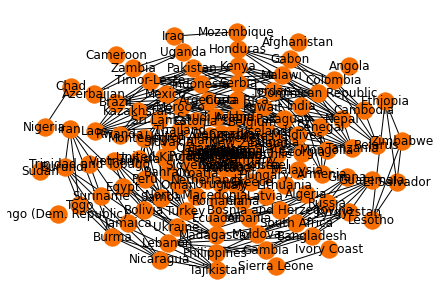

In [ ]:
ppr1 = nx.pagerank(G)
sortedRank = dict(sorted(ppr1.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedRank.items():
        print(attr, ":", value)
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

In [ ]:
closenessCentrality = nx.closeness_centrality(G)
sortedClosenessCentrality =  dict(sorted(closenessCentrality.items(), key=lambda item: item[1], reverse=True))

for attr, value in sortedClosenessCentrality.items():
        print(attr, ":", value)

Czechia : 0.058823529411764705
Denmark : 0.058823529411764705
United Arab Emirates : 0.058823529411764705
Finland : 0.058823529411764705
Qatar : 0.058823529411764705
Poland : 0.058823529411764705
Slovenia : 0.058823529411764705
Croatia : 0.058823529411764705
Netherlands : 0.058823529411764705
Tanzania : 0.058823529411764705
Nepal : 0.058823529411764705
Dominican Republic : 0.058823529411764705
Malawi : 0.058823529411764705
Kenya : 0.058823529411764705
Pakistan : 0.058823529411764705
Timor-Leste : 0.058823529411764705
Brazil : 0.058823529411764705
Laos : 0.058823529411764705
Georgia : 0.04411764705882353
Maldives : 0.04411764705882353
Paraguay : 0.04411764705882353
Kuwait : 0.04411764705882353
Costa Rica : 0.04411764705882353
Argentina : 0.04411764705882353
Morocco : 0.04411764705882353
Chile : 0.03676470588235294
Bulgaria : 0.03676470588235294
Iceland : 0.03676470588235294
Belgium : 0.03676470588235294
Ireland : 0.03676470588235294
Saudi Arabia : 0.03676470588235294
Sri Lanka : 0.03676

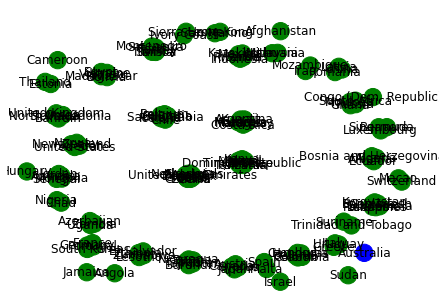

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G)
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
betweenessCentrality = nx.betweenness_centrality(G)

sortedbetweenessCentrality =  dict(sorted(betweenessCentrality.items(), key=lambda item: item[1], reverse=True))

for attr, value in sortedbetweenessCentrality.items():
        print(attr, ":", value)

Australia : 0.0
San Marino : 0.0
Hong Kong : 0.0
Macao : 0.0
Switzerland : 0.0
Spain : 0.0
Malta : 0.0
Luxembourg : 0.0
Singapore : 0.0
Bermuda : 0.0
Canada : 0.0
Japan : 0.0
Cyprus : 0.0
Austria : 0.0
Portugal : 0.0
France : 0.0
South Korea : 0.0
Germany : 0.0
Norway : 0.0
United States : 0.0
New Zealand : 0.0
Sweden : 0.0
Czechia : 0.0
Denmark : 0.0
United Arab Emirates : 0.0
Finland : 0.0
Qatar : 0.0
Poland : 0.0
Slovenia : 0.0
Croatia : 0.0
Netherlands : 0.0
Uruguay : 0.0
Italy : 0.0
Greece : 0.0
Hungary : 0.0
Israel : 0.0
Chile : 0.0
Bulgaria : 0.0
Iceland : 0.0
Belgium : 0.0
Ireland : 0.0
Saudi Arabia : 0.0
Estonia : 0.0
Thailand : 0.0
Slovakia : 0.0
United Kingdom : 0.0
Bahrain : 0.0
Oman : 0.0
North Macedonia : 0.0
Romania : 0.0
China : 0.0
Latvia : 0.0
Lithuania : 0.0
Malaysia : 0.0
Georgia : 0.0
Maldives : 0.0
Paraguay : 0.0
Kuwait : 0.0
Costa Rica : 0.0
Argentina : 0.0
Morocco : 0.0
Sri Lanka : 0.0
Montenegro : 0.0
Tunisia : 0.0
Peru : 0.0
Samoa : 0.0
Turkey : 0.0
Ecuador : 

In [ ]:
G = bipartite.weighted_projected_graph(B, Country)
#eigen vector
eigenVectorCentrality = nx.eigenvector_centrality(G, weight='weight')

sortedEigenVectorCentrality =  dict(sorted(eigenVectorCentrality.items(), key=lambda item: item[1], reverse=True))

for attr, value in sortedEigenVectorCentrality.items():
        print(attr, ":", value)

Czechia : 0.23570225752684248
Denmark : 0.23570225752684248
United Arab Emirates : 0.23570225752684248
Finland : 0.23570225752684248
Qatar : 0.23570225752684248
Poland : 0.23570225752684248
Slovenia : 0.23570225752684248
Croatia : 0.23570225752684248
Netherlands : 0.23570225752684248
Tanzania : 0.23570225752684248
Nepal : 0.23570225752684248
Dominican Republic : 0.23570225752684248
Malawi : 0.23570225752684248
Kenya : 0.23570225752684248
Pakistan : 0.23570225752684248
Timor-Leste : 0.23570225752684248
Brazil : 0.23570225752684248
Laos : 0.23570225752684248
Georgia : 5.896526451956503e-05
Maldives : 5.896526451956503e-05
Paraguay : 5.896526451956503e-05
Kuwait : 5.896526451956503e-05
Costa Rica : 5.896526451956503e-05
Argentina : 5.896526451956503e-05
Morocco : 5.896526451956503e-05
Chile : 3.6421027457825165e-07
Bulgaria : 3.6421027457825165e-07
Iceland : 3.6421027457825165e-07
Belgium : 3.6421027457825165e-07
Ireland : 3.6421027457825165e-07
Saudi Arabia : 3.6421027457825165e-07
Sri L

In [ ]:
short1 = nx.shortest_path_length(G, source="Horror", target="Black Comedy", weight="weight")

nodesList = ['Adventure', 'Comedy', 'Musical', 'Action', 'Thriller/Suspense', 'Western', 'Horror', 'Documentary', 'Black Comedy', 'Concert/Performance']

def findSumShortestPaths(sourceArg):
  sum = 0
  for item in nodesList:
    print(nx.shortest_path_length(G, source=sourceArg, target=item, weight="weight"))
    sum += nx.shortest_path_length(G, source=sourceArg, target=item, weight="weight")
  return sum

print(findSumShortestPaths('Action'))